## Marketing Campaign Analysis

# Objective

The goal of this notebook is to do an analysis of how effective the campaigns were and derive other insights using a publically available data set of a Facebook marketing campaign. The product being marketed is an app. "conversions" refer to installs of the app. "Interests" are assumed to be categorical (e.g. 1 might refer to an interest in someting, 17 would refer to an interest in something else)


Data pulled from this source
https://www.kaggle.com/madislemsalu/facebook-ad-campaign



## TL;DR Conclusion

Best demographic to target would be females 30-34


	

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm


df = pd.read_csv("data.csv")

In [2]:
df.describe()

,ad_id,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
count,1.143000e+03,1143.000000,1.143000e+03,1143.000000,1.143000e+03,1143.000000,1143.000000,761.000000,761.000000
mean,9.872611e+05,33.884514,1.180606e+05,42.474191,6.872500e+04,11.629921,17.597760,2.161629,0.768725
std,1.939928e+05,27.560263,2.670506e+05,48.987248,2.067023e+05,27.347899,48.418711,4.062201,1.656445
min,7.087460e+05,2.000000,3.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,16.000000,2.200000e+01,19.000000,1.442650e+02,1.000000,0.000000,1.000000,0.000000
50%,1.121185e+06,26.000000,3.300000e+01,27.000000,3.142000e+03,2.000000,1.530000,1.000000,0.000000
75%,1.121804e+06,32.000000,9.889400e+04,38.000000,2.786400e+04,8.000000,8.540000,2.000000,1.000000
max,1.314415e+06,120.000000,2.286228e+06,421.000000,3.052003e+06,340.000000,639.949998,60.000000,21.000000


In [3]:
#Two columns of data are missing for some of these entries. The age column has been moved over and it is preventing
#the campaign_id column from being converted into integers. This  cell removes those entires from the data frame and 
#converts the campign_id column into integers

data = df[df.campaign_id != '40-44']

data = data[data.campaign_id != '45-49']

data = data[data.campaign_id != '35-39']

data = data[data.campaign_id != '30-34']

data.campaign_id = data.campaign_id.astype('int')

In [4]:
#This Cell turns the gender column into a dummy variable

data.gender.replace(['M','F'], [1,0], inplace= True)

In [5]:
#This cell creates a categoricaln variable for the age column. 0 = 30-34, 1 = 35-39 etc.

data["age_categorical"] = data.age

data.age_categorical.replace(['30-34', '35-39', '40-44', '45-49'], [0,1,2,3], inplace=True)



In [6]:
len(data)

761

In [7]:
#This Cell creates a function to determine whether the category variable appears in more than one 'interest' column

interest1 = data.interest1
interest2 = data.interest2
interest3 = data.interest3
    
column = []
def interest():
    count = 0
    while len(column) <= 760:
        if interest1.iloc[count] == interest2.iloc[count]:
            count += 1
            column.append(1)
        if interest1.iloc[count] == interest3.iloc[count]:
            count += 1
            column.append(1)
        if interest2.iloc[count] == interest3.iloc[count]:
            count += 1
            column.append(1)
        else:
            count += 1
            column.append(0)


In [8]:
#This cell adds the result of the interest function from the previous cell to the dataframe

print(interest())

column = pd.Series(column)

data["focused_interest"] = column

data.head()

None


,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion,age_categorical,focused_interest
0,708746,17/08/2017,17/08/2017,916,103916,30-34,1,15,17,17,7350.0,1,1.43,2.0,1.0,0,1
1,708749,17/08/2017,17/08/2017,916,103917,30-34,1,16,19,21,17861.0,2,1.82,2.0,0.0,0,0
2,708771,17/08/2017,17/08/2017,916,103920,30-34,1,20,25,22,693.0,0,0.00,1.0,0.0,0,0
3,708815,30/08/2017,30/08/2017,916,103928,30-34,1,28,32,32,4259.0,1,1.25,1.0,0.0,0,1
4,708818,17/08/2017,17/08/2017,916,103928,30-34,1,28,33,32,4133.0,1,1.29,1.0,1.0,0,0


In [9]:
data.describe()

,ad_id,campaign_id,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion,age_categorical,focused_interest
count,7.610000e+02,761.000000,761.000000,761.000000,761.000000,761.000000,7.610000e+02,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000
mean,8.956389e+05,1011.855453,0.638633,25.473062,28.977661,28.984231,1.031716e+05,15.340342,25.782181,2.161629,0.768725,1.055191,0.149803
std,1.670937e+05,113.981878,0.480712,15.508898,15.607548,15.604816,2.462644e+05,32.715738,57.622334,4.062201,1.656445,1.102439,0.357113
min,7.087460e+05,916.000000,0.000000,2.000000,3.000000,3.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.480860e+05,936.000000,0.000000,16.000000,19.000000,19.000000,3.149000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,7.811750e+05,936.000000,1.000000,22.000000,26.000000,25.000000,1.219300e+04,3.000000,3.580000,1.000000,0.000000,1.000000,0.000000
75%,1.121184e+06,1178.000000,1.000000,29.000000,33.000000,33.000000,8.597000e+04,14.000000,23.210000,2.000000,1.000000,2.000000,0.000000
max,1.121593e+06,1178.000000,1.000000,66.000000,72.000000,72.000000,3.052003e+06,340.000000,639.949998,60.000000,21.000000,3.000000,1.000000


In [10]:
#KPI's for all campaigns 
kpi_overall = pd.DataFrame({'Total_spent': [data.spent.sum()],
                   'Total_conversion': [data.total_conversion.sum()],
                   'Total_Impressions': [data.impressions.sum()],
                   'Total_clicks' : [data.clicks.sum()],
                   'Cost_per_Conversion': [data.spent.sum()/data.total_conversion.sum()],
                   'Cost_per_Impression': [data.spent.sum()/data.impressions.sum()],
                   'Cost_per_Click': [data.spent.sum()/data.clicks.sum()],
                   'Click_through_Rate': [(data.clicks.sum()/data.impressions.sum())],
                   'Conversion_Rate': [data.total_conversion.sum()/data.clicks.sum()]})

#KPI's for male demographic
kpi_m_demo = pd.DataFrame({ 'Total_spent': [data.query("gender == 1").spent.sum()],
                          'Total_conversion': [data.query("gender == 1").total_conversion.sum()],
                          'Total_Impressions': [data.query("gender == 1").impressions.sum()],
                          'Total_clicks': [data.query("gender == 1").clicks.sum()],
                          'Cost_per_Conversion': [data.query("gender == 1").spent.sum()/data.query("gender == 1").total_conversion.sum()],
                          'Cost_per_Impression': [data.query("gender == 1").spent.sum()/data.query("gender == 1").impressions.sum()],
                          'Cost_per_Click': [data.query("gender == 1").spent.sum()/data.query("gender == 1").clicks.sum()],
                          'Click_through_Rate': [data.query("gender == 1").clicks.sum()/data.query("gender == 1").impressions.sum()],
                          'Conversion_Rate': [data.query("gender == 1").total_conversion.sum()/data.query("gender == 1").clicks.sum()]})
#KPI's for female demographic
kpi_f_demo = pd.DataFrame({ 'Total_spent': [data.query("gender == 0").spent.sum()],
                          'Total_conversion': [data.query("gender == 0").total_conversion.sum()],
                          'Total_Impressions': [data.query("gender == 0").impressions.sum()],
                          'Total_clicks': [data.query("gender == 0").clicks.sum()],
                          'Cost_per_Conversion': [data.query("gender == 0").spent.sum()/data.query("gender == 0").total_conversion.sum()],
                          'Cost_per_Impression': [data.query("gender == 0").spent.sum()/data.query("gender == 0").impressions.sum()],
                          'Cost_per_Click': [data.query("gender == 0").spent.sum()/data.query("gender == 0").clicks.sum()],
                          'Click_through_Rate': [data.query("gender == 0").clicks.sum()/data.query("gender == 0").impressions.sum()],
                          'Conversion_Rate': [data.query("gender == 0").total_conversion.sum()/data.query("gender == 0").clicks.sum()]})
#KPI's for campaign ID 916

kpi_916_demo = pd.DataFrame({ 'Total_spent': [data.query("campaign_id == 916").spent.sum()],
                          'Total_conversion': [data.query("campaign_id == 916").total_conversion.sum()],
                          'Total_Impressions': [data.query("campaign_id == 916").impressions.sum()],
                          'Total_clicks': [data.query("campaign_id == 916").clicks.sum()],
                          'Cost_per_Conversion': [data.query("campaign_id == 916").spent.sum()/data.query("campaign_id == 916").total_conversion.sum()],
                          'Cost_per_Impression': [data.query("campaign_id == 916").spent.sum()/data.query("campaign_id == 916").impressions.sum()],
                          'Cost_per_Click': [data.query("campaign_id == 916").spent.sum()/data.query("campaign_id == 916").clicks.sum()],
                          'Click_through_Rate': [data.query("campaign_id == 916").clicks.sum()/data.query("campaign_id == 916").impressions.sum()],
                          'Conversion_Rate': [data.query("campaign_id == 916").total_conversion.sum()/data.query("campaign_id == 916").clicks.sum()]})

#KPI's for campaign ID 936
kpi_936_demo = pd.DataFrame({ 'Total_spent': [data.query("campaign_id == 936").spent.sum()],
                          'Total_conversion': [data.query("campaign_id == 936").total_conversion.sum()],
                          'Total_Impressions': [data.query("campaign_id == 936").impressions.sum()],
                          'Total_clicks': [data.query("campaign_id == 936").clicks.sum()],
                          'Cost_per_Conversion': [data.query("campaign_id == 936").spent.sum()/data.query("campaign_id == 936").total_conversion.sum()],
                          'Cost_per_Impression': [data.query("campaign_id == 936").spent.sum()/data.query("campaign_id == 936").impressions.sum()],
                          'Cost_per_Click': [data.query("campaign_id == 936").spent.sum()/data.query("campaign_id == 936").clicks.sum()],
                          'Click_through_Rate': [data.query("campaign_id == 936").clicks.sum()/data.query("campaign_id == 936").impressions.sum()],
                          'Conversion_Rate': [data.query("campaign_id == 936").total_conversion.sum()/data.query("campaign_id == 936").clicks.sum()]})

#KPI for campaign ID 1178
kpi_1178_demo = pd.DataFrame({ 'Total_spent': [data.query("campaign_id == 1178").spent.sum()],
                          'Total_conversion': [data.query("campaign_id == 1178").total_conversion.sum()],
                          'Total_Impressions': [data.query("campaign_id == 1178").impressions.sum()],
                          'Total_clicks': [data.query("campaign_id == 1178").clicks.sum()],
                          'Cost_per_Conversion': [data.query("campaign_id == 1178").spent.sum()/data.query("campaign_id == 1178").total_conversion.sum()],
                          'Cost_per_Impression': [data.query("campaign_id == 1178").spent.sum()/data.query("campaign_id == 1178").impressions.sum()],
                          'Cost_per_Click': [data.query("campaign_id == 1178").spent.sum()/data.query("campaign_id == 1178").clicks.sum()],
                          'Click_through_Rate': [data.query("campaign_id == 1178").clicks.sum()/data.query("campaign_id == 1178").impressions.sum()],
                          'Conversion_Rate': [data.query("campaign_id == 1178").total_conversion.sum()/data.query("campaign_id == 1178").clicks.sum()]})

#KPI for age demo 30-34

kpi_34_demo = pd.DataFrame({ 'Total_spent': [data.query("age == '30-34'").spent.sum()],
                          'Total_conversion': [data.query("age == '30-34'").total_conversion.sum()],
                          'Total_Impressions': [data.query("age == '30-34'").impressions.sum()],
                          'Total_clicks': [data.query("age == '30-34'").clicks.sum()],
                          'Cost_per_Conversion': [data.query("age == '30-34'").spent.sum()/data.query("age == '30-34'").total_conversion.sum()],
                          'Cost_per_Impression': [data.query("age == '30-34'").spent.sum()/data.query("age == '30-34'").impressions.sum()],
                          'Cost_per_Click': [data.query("age == '30-34'").spent.sum()/data.query("age == '30-34'").clicks.sum()],
                          'Click_through_Rate': [data.query("age == '30-34'").clicks.sum()/data.query("age == '30-34'").impressions.sum()],
                          'Conversion_Rate': [data.query("age == '30-34'").total_conversion.sum()/data.query("age == '30-34'").clicks.sum()]})

#KPI for age demo 35-39

kpi_39_demo = pd.DataFrame({ 'Total_spent': [data.query("age == '35-39'").spent.sum()],
                          'Total_conversion': [data.query("age == '35-39'").total_conversion.sum()],
                          'Total_Impressions': [data.query("age == '35-39'").impressions.sum()],
                          'Total_clicks': [data.query("age == '35-39'").clicks.sum()],
                          'Cost_per_Conversion': [data.query("age == '35-39'").spent.sum()/data.query("age == '35-39'").total_conversion.sum()],
                          'Cost_per_Impression': [data.query("age == '35-39'").spent.sum()/data.query("age == '35-39'").impressions.sum()],
                          'Cost_per_Click': [data.query("age == '35-39'").spent.sum()/data.query("age == '35-39'").clicks.sum()],
                          'Click_through_Rate': [data.query("age == '35-39'").clicks.sum()/data.query("age == '35-39'").impressions.sum()],
                          'Conversion_Rate': [data.query("age == '35-39'").total_conversion.sum()/data.query("age == '35-39'").clicks.sum()]})

#KPI for agedemo 40-44
kpi_44_demo = pd.DataFrame({ 'Total_spent': [data.query("age == '40-44'").spent.sum()],
                          'Total_conversion': [data.query("age == '40-44'").total_conversion.sum()],
                          'Total_Impressions': [data.query("age == '40-44'").impressions.sum()],
                          'Total_clicks': [data.query("age == '40-44'").clicks.sum()],
                          'Cost_per_Conversion': [data.query("age == '40-44'").spent.sum()/data.query("age == '40-44'").total_conversion.sum()],
                          'Cost_per_Impression': [data.query("age == '40-44'").spent.sum()/data.query("age == '40-44'").impressions.sum()],
                          'Cost_per_Click': [data.query("age == '40-44'").spent.sum()/data.query("age == '40-44'").clicks.sum()],
                          'Click_through_Rate': [data.query("age == '40-44'").clicks.sum()/data.query("age == '40-44'").impressions.sum()],
                          'Conversion_Rate': [data.query("age == '40-44'").total_conversion.sum()/data.query("age == '40-44'").clicks.sum()]})

#KPI for age demo 44-49

kpi_49_demo = pd.DataFrame({ 'Total_spent': [data.query("age == '45-49'").spent.sum()],
                          'Total_conversion': [data.query("age == '45-49'").total_conversion.sum()],
                          'Total_Impressions': [data.query("age == '45-49'").impressions.sum()],
                          'Total_clicks': [data.query("age == '45-49'").clicks.sum()],
                          'Cost_per_Conversion': [data.query("age == '45-49'").spent.sum()/data.query("age == '45-49'").total_conversion.sum()],
                          'Cost_per_Impression': [data.query("age == '45-49'").spent.sum()/data.query("age == '45-49'").impressions.sum()],
                          'Cost_per_Click': [data.query("age == '45-49'").spent.sum()/data.query("age == '45-49'").clicks.sum()],
                          'Click_through_Rate': [data.query("age == '45-49'").clicks.sum()/data.query("age == '45-49'").impressions.sum()],
                          'Conversion_Rate': [data.query("age == '45-49'").total_conversion.sum()/data.query("age == '45-49'").clicks.sum()]})


#This section creates a dataframe with relevant kpi's and labels the columns
kpi_names = pd.DataFrame({'Segment':['Overall', 'Male Demo', 'Female Demo', 'Campaign 916', 'Campaign 936', 'Campaign 1178', 'Age 30-34', 'Age 35-39', 'Age 40-44', 'Age 45-45']})


all_kpi = [kpi_overall, kpi_m_demo, kpi_f_demo, kpi_916_demo, kpi_936_demo, kpi_1178_demo, kpi_34_demo, kpi_39_demo, kpi_44_demo, kpi_49_demo]
                  
all_kpi = pd.concat(all_kpi)
       
all_kpi.reset_index(drop=True, inplace=True)      

all_kpi['Segment'] = kpi_names


all_kpi = all_kpi[['Segment','Total_spent', 'Total_conversion', 'Total_Impressions', 'Total_clicks', 'Cost_per_Conversion', 'Cost_per_Impression', 'Cost_per_Click', 'Click_through_Rate', 'Conversion_Rate']]


all_kpi

,Segment,Total_spent,Total_conversion,Total_Impressions,Total_clicks,Cost_per_Conversion,Cost_per_Impression,Cost_per_Click,Click_through_Rate,Conversion_Rate
0,Overall,19620.239997,1645.0,78513588.0,11674,11.927198,0.000250,1.680678,0.000149,0.140911
1,Male Demo,17170.029999,1323.0,72026301.0,9989,12.978103,0.000238,1.718894,0.000139,0.132446
2,Female Demo,2450.209999,322.0,6487287.0,1685,7.609348,0.000378,1.454131,0.000260,0.191098
3,Campaign 916,149.710001,58.0,482925.0,113,2.581207,0.000310,1.324867,0.000234,0.513274
4,Campaign 936,2893.369999,537.0,8128187.0,1984,5.388026,0.000356,1.458352,0.000244,0.270665
5,Campaign 1178,16577.159998,1050.0,69902476.0,9577,15.787771,0.000237,1.730935,0.000137,0.109638
6,Age 30-34,7693.219994,890.0,35678593.0,4433,8.644067,0.000216,1.735443,0.000124,0.200767
7,Age 35-39,5145.520004,357.0,20165377.0,3005,14.413221,0.000255,1.712319,0.000149,0.118802
8,Age 40-44,4337.629999,235.0,15881589.0,2660,18.458000,0.000273,1.630688,0.000167,0.088346
9,Age 45-45,2443.870000,163.0,6788029.0,1576,14.993067,0.000360,1.550679,0.000232,0.103426


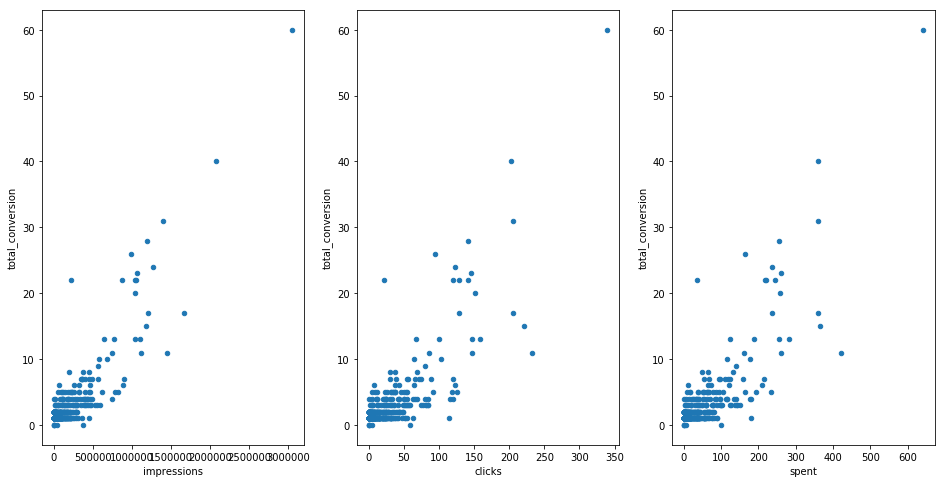

In [11]:
fig, axs = plt.subplots(1, 3)
data.plot(kind='scatter', x='impressions', y='total_conversion', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='clicks', y='total_conversion', ax=axs[1])
data.plot(kind='scatter', x='spent', y='total_conversion', ax=axs[2])

In [12]:
#This cell runs a linear regression for all variables on their effect on total conversion

regression = sm.ols(formula = "total_conversion ~ impressions + clicks + spent + gender + focused_interest + age_categorical", data = data).fit()

regression.params

Intercept           1.210359
impressions         0.000031
clicks             -0.049620
spent              -0.042649
gender             -0.495693
focused_interest    0.035199
age_categorical    -0.071790
dtype: float64

In [13]:
#This cell displays the summary of the regression
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       total_conversion   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     632.9
Date:                Sat, 29 Jun 2019   Prob (F-statistic):          2.28e-290
Time:                        12:02:59   Log-Likelihood:                -1462.0
No. Observations:                 761   AIC:                             2938.
Df Residuals:                     754   BIC:                             2970.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.2104      0.125      9.653      0.000       0.964       1.456
impressions       3.101e-05   1.44e-06     21.520      0.000    2.82e-05    3.38e-05
clicks              -0.0496      0.029     -1.706      0.088      -0.107       0.007
spent               -0.0426      0.020     -2.144      0.032      -0.082      -0.004
gender              -0.4957      0.131     -3.789      0.000      -0.753      -0.239
focused_interest     0.0352      0.169      0.208      0.835      -0.297       0.367
age_categorical     -0.0718      0.058     -1.236      0.217      -0.186       0.042
==============================================================================
Omnibus:                      452.318   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20141.205
Skew:                           1.999   Prob(JB):                         0.00
Kurtosis:                      27.884   Cond. No.                     7.75e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.75e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The Dummy variable created for Focused interest appears to be insignificant. The R squared value is pretty so tis model model works farily well. 

In [14]:
#creates a dataframe that can be used to predict values from the regression model

reg_x_test = pd.DataFrame({'impressions': [data.impressions.min(), data.impressions.max()],
                           'clicks': [data.clicks.min(), data.clicks.max()], 
                           'spent' : [data.spent.min(), data.spent.max()],
                           'gender' : [data.gender.min(), data.gender.max()] ,
                           'focused_interest' : [data.focused_interest.min(), data.focused_interest.max()],
                          'age_categorical' : [data.age_categorical.min(), data.focused_interest.max()]})




In [15]:
#This cell creates a dataframe that can be used to plot the trendline for the regression
#Impressions is used as the X-value as it appears to have te bioggest impact on total conversions

#predicts the values
preds = regression.predict(reg_x_test)


#assigns te values from the prediction and the other variables for graphing purposes
y_value = pd.DataFrame({'conversion_prediction':[preds.min(), preds.max()],
                        'total_conversion':[data.total_conversion.min(), data.total_conversion.max()],
                       'impressions': [data.impressions.min(), data.impressions.max()],
                       'clicks': [data.clicks.min(), data.clicks.max()], 
                       'spent':[data.spent.min(), data.spent.max()]})


y_value

,clicks,conversion_prediction,impressions,spent,total_conversion
0,0,1.213056,87.0,0.000000,0.0
1,340,51.148819,3052003.0,639.949998,60.0


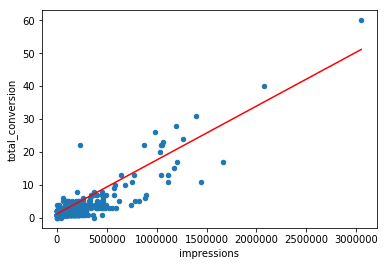

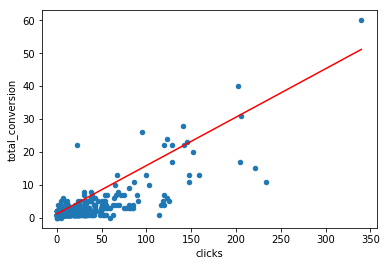

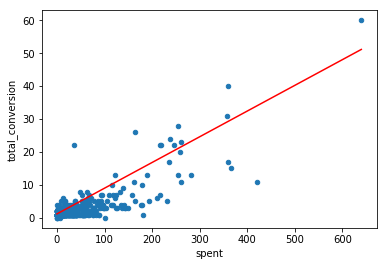

In [16]:
#This cell plots a trend line to three different variables

data.plot(kind='scatter', x='impressions', y='total_conversion')
plt.plot( y_value.impressions,y_value.conversion_prediction, c='red')


data.plot(kind='scatter', x='clicks', y='total_conversion')
plt.plot(y_value.clicks, y_value.conversion_prediction, c='red')


data.plot(kind='scatter', x='spent', y='total_conversion')
plt.plot(y_value.spent, y_value.conversion_prediction, c='red')

In [17]:
#This cell adds the predictions for each column to the dataframe

conversion_prediction = regression.predict()

data["conversion_prediction"] = conversion_prediction


In [18]:
best_predictions = data.query('gender == 0')

best_predictions = best_predictions.query('age_categorical == 0')

best_predictions = best_predictions.query('focused_interest == 1')

best_predictions.spent.sum() / best_predictions.total_conversion.sum()



2.806923059307693

In [19]:
data.query("campaign_id == 916")

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion,age_categorical,focused_interest,conversion_prediction
0,708746,17/08/2017,17/08/2017,916,103916,30-34,1,15,17,17,7350.0,1,1.43,2.0,1.0,0,1,0.867161
1,708749,17/08/2017,17/08/2017,916,103917,30-34,1,16,19,21,17861.0,2,1.82,2.0,0.0,0,0,1.091627
2,708771,17/08/2017,17/08/2017,916,103920,30-34,1,20,25,22,693.0,0,0.00,1.0,0.0,0,0,0.736154
3,708815,30/08/2017,30/08/2017,916,103928,30-34,1,28,32,32,4259.0,1,1.25,1.0,0.0,0,1,0.778995
4,708818,17/08/2017,17/08/2017,916,103928,30-34,1,28,33,32,4133.0,1,1.29,1.0,1.0,0,0,0.738182
5,708820,17/08/2017,17/08/2017,916,103929,30-34,1,29,30,30,1915.0,0,0.00,1.0,1.0,0,1,0.809244
6,708889,17/08/2017,17/08/2017,916,103940,30-34,1,15,16,17,15615.0,3,4.77,1.0,0.0,0,0,0.846551
7,708895,17/08/2017,17/08/2017,916,103941,30-34,1,16,20,18,10951.0,1,1.27,1.0,1.0,0,0,0.950443
8,708953,17/08/2017,17/08/2017,916,103951,30-34,1,27,31,31,2355.0,1,1.50,1.0,0.0,0,1,0.709294
9,708958,30/08/2017,30/08/2017,916,103952,30-34,1,28,32,31,9502.0,3,3.16,1.0,0.0,0,0,0.725668


In [20]:
data.query('total_conversion > 20')

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion,age_categorical,focused_interest,conversion_prediction
518,1121091,28/08/2017,28/08/2017,1178,144531,30-34,1,10,11,15,1194718.0,141,254.049996,28.0,14.0,0,0,19.928405
524,1121098,29/08/2017,29/08/2017,1178,144532,30-34,1,15,18,21,1267550.0,123,236.769999,24.0,10.0,0,0,23.816858
525,1121100,29/08/2017,29/08/2017,1178,144532,30-34,1,15,20,17,3052003.0,340,639.949998,60.0,17.0,0,0,51.185409
528,1121104,25/08/2017,25/08/2017,1178,144533,30-34,1,16,20,20,2080666.0,202,360.150002,40.0,21.0,0,1,39.882663
531,1121108,26/08/2017,26/08/2017,1178,144533,30-34,1,16,20,18,984521.0,95,163.899997,26.0,14.0,0,0,19.538044
561,1121167,19/08/2017,19/08/2017,1178,144545,30-34,1,25,29,31,1063508.0,145,260.380001,23.0,7.0,0,0,15.391486
568,1121182,20/08/2017,20/08/2017,1178,144549,30-34,1,27,28,33,876671.0,120,216.559998,22.0,4.0,0,0,12.707528
574,1121196,23/08/2017,23/08/2017,1178,144552,30-34,1,28,29,29,1392288.0,206,358.550003,31.0,7.0,0,1,18.407650
577,1121203,23/08/2017,23/08/2017,1178,144554,30-34,1,29,35,33,1048861.0,128,219.770002,22.0,8.0,0,0,17.512821
579,1121206,23/08/2017,23/08/2017,1178,144554,30-34,1,29,34,31,227925.0,22,35.310000,22.0,12.0,0,0,5.184453
